## The Sparks Foundation GRIP Task 3
## Exploratory Data Analysis (SuperStore)
## Name : Paras Rawat

In [2]:
#import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#read the data set

retail=pd.read_csv('SampleSuperstore.csv')

In [4]:
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
retail.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
retail['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

<AxesSubplot:xlabel='Category', ylabel='count'>

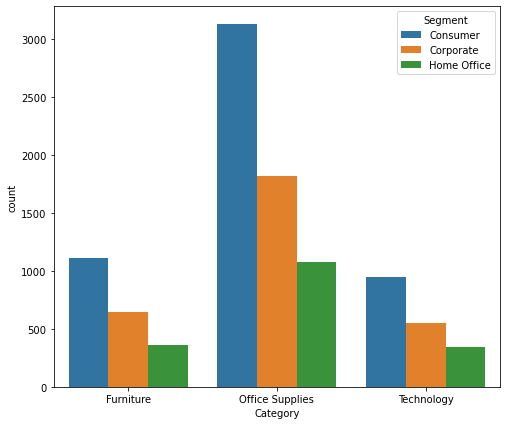

In [256]:
plt.figure(figsize=(8,7))
sns.countplot(x="Category",data=retail,hue='Segment')

<AxesSubplot:xlabel='Category', ylabel='count'>

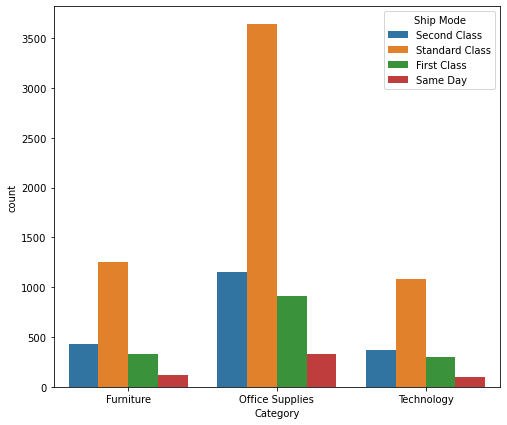

In [257]:
plt.figure(figsize=(8,7))
sns.countplot(x="Category",data=retail,hue='Ship Mode')

In [9]:
retail['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

Text(0.5, 1.0, 'Quantities of Sub-Category Sold')

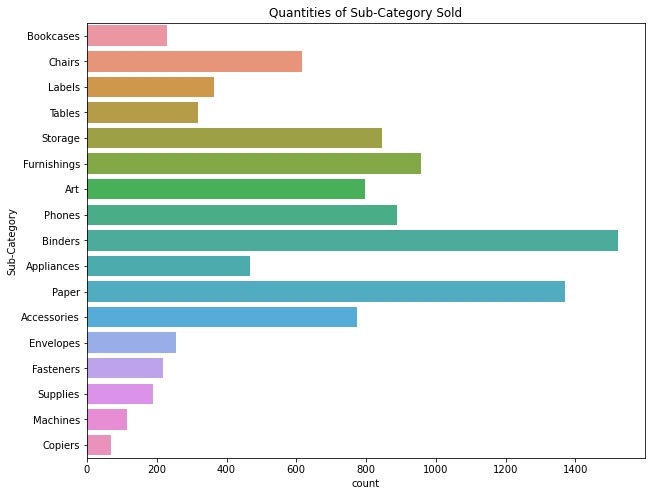

In [89]:
plt.figure(figsize=(10,8))
x=sns.countplot(y="Sub-Category",data=retail,orient='h')
plt.title('Quantities of Sub-Category Sold')

In [11]:
retail.groupby('Sub-Category').sum()['Quantity'].sort_values(ascending=False)

Sub-Category
Binders        5974
Paper          5178
Furnishings    3563
Phones         3289
Storage        3158
Art            3000
Accessories    2976
Chairs         2356
Appliances     1729
Labels         1400
Tables         1241
Fasteners       914
Envelopes       906
Bookcases       868
Supplies        647
Machines        440
Copiers         234
Name: Quantity, dtype: int64

Top 3 most sold products:
1) Blinders  :   5974 unit sold <br>
2) Paper     :   5178 unit sold <br>
3) Furnishings  : 3563 unit sold

Text(0.5, 1.0, 'Sales in Sub-Category')

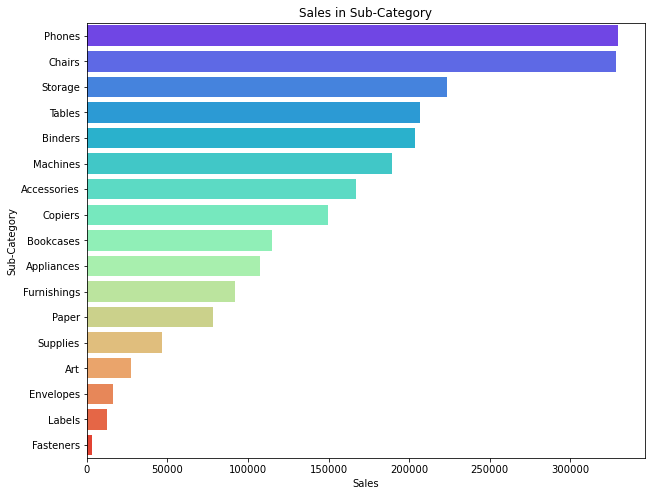

In [88]:
plt.figure(figsize=(10,8))
d=retail.groupby('Sub-Category').sum()['Sales'].sort_values(ascending=False)
d=pd.DataFrame(d)
d.reset_index(inplace=True)
sns.barplot(y='Sub-Category',x='Sales',data=d,palette="rainbow")
plt.title('Sales in Sub-Category')

In [14]:
retail['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [32]:
retail.groupby('Segment').sum()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288878609,1.161401e+06,19521,820.91,134119.2092
Corporate,164536330,7.061464e+05,11608,477.85,91979.1340
Home Office,98157713,4.296531e+05,6744,262.33,60298.6785


Text(0.5, 1.0, 'Profit wrt Segments')

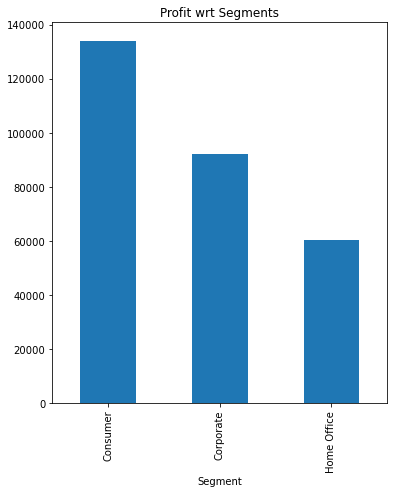

In [273]:
z=retail.groupby('Segment').sum()['Profit']
plt.figure(figsize=(6,7))
z.plot(kind='bar')
plt.title('Profit wrt Segments')

In [271]:
y=retail.groupby('Segment').sum()['Quantity']

Text(0.5, 1.0, 'Units sold wrt Segments')

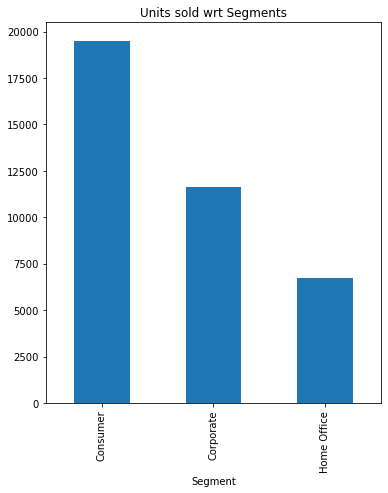

In [272]:
plt.figure(figsize=(6,7))
y.plot(kind='bar')
plt.title('Units sold wrt Segments')

Sale and Profit in Consumer Segment is comparitivey higher than the other segments

In [265]:
retail.groupby('Ship Mode').sum()

,Postal Code,Sales,Quantity,Discount,Profit
Ship Mode,,,,,
First Class,84229511,3.514284e+05,5693,253.17,48969.8399
Same Day,31242093,1.283631e+05,1960,82.75,15891.7589
Second Class,108192588,4.591936e+05,7423,270.15,57446.6354
Standard Class,327908460,1.358216e+06,22797,955.02,164088.7875


Text(0.5, 1.0, 'Proft wrt to Ship Mode')

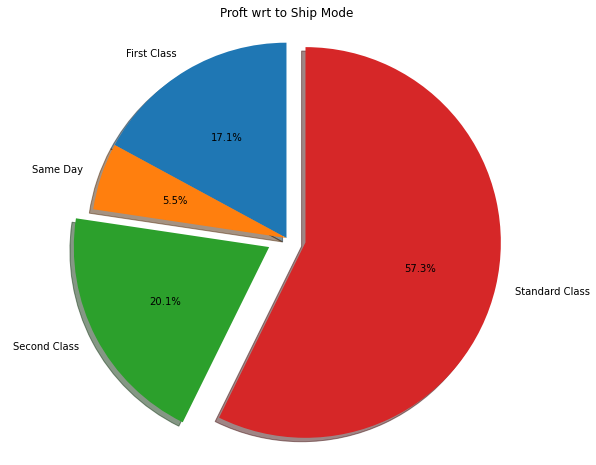

In [264]:
z=retail.groupby('Ship Mode').sum()['Profit']

fig1, ax1 = plt.subplots(figsize=(10,8))
sizes=z.values
explode=(0,0,0.1,0.1)
labels=z.index
x=ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
y=ax1.axis('equal')
plt.title("Proft wrt to Ship Mode")


Text(0.5, 1.0, 'Profit wrt to Region')

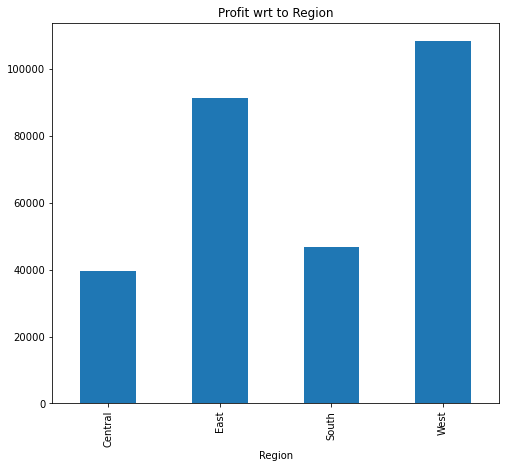

In [281]:
z=retail.groupby('Region').sum()['Profit']
plt.figure(
    figsize=(8,7))
z.plot(kind='bar')
plt.title('Profit wrt to Region')

The Store make the most profit in the Western region of the Country

In [19]:
retail['State'].unique() 

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [20]:
#Top Five States with most Sales
retail.groupby('State').sum()['Quantity'].sort_values(ascending=False).head(5)

State
California      7667
New York        4224
Texas           3724
Pennsylvania    2153
Washington      1883
Name: Quantity, dtype: int64

In [217]:
z=retail.groupby('State').sum()['Sales'].sort_values(ascending=False).head(5)

Text(0.5, 1.0, 'Top Five States In US with most Sales')

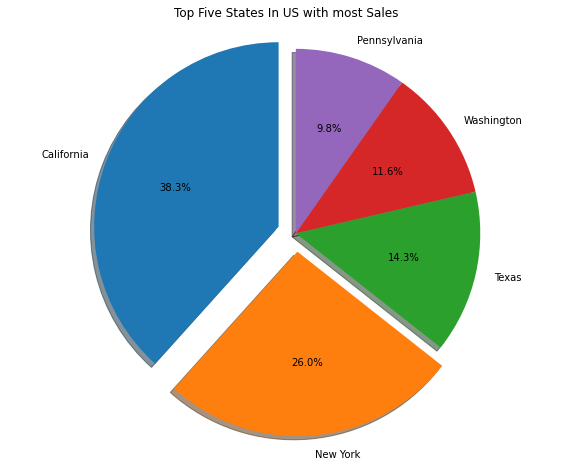

In [218]:

fig1, ax1 = plt.subplots(figsize=(10,8))
sizes=z.values
explode=(0.1,0.1,0,0,0)
labels=z.index
x=ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
y=ax1.axis('equal')
plt.title("Top Five States In US with most Sales")


Text(0.5, 1.0, 'Top Five States In US with most Profit')

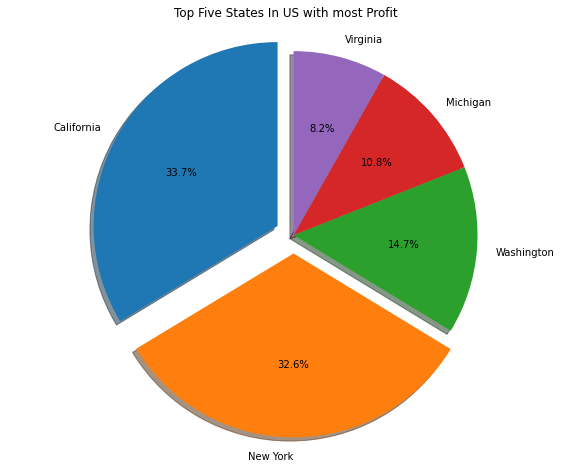

In [241]:
z=retail.groupby('State').sum()['Profit'].sort_values(ascending=False).head(5)
fig1, ax1 = plt.subplots(figsize=(10,8))
sizes=z.values
explode=(0.1,0.1,0,0,0)
labels=z.index
x=ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
y=ax1.axis('equal')
plt.title("Top Five States In US with most Profit")


In [172]:
z=retail.groupby(['Segment',retail['State']=='California']).sum()
z.reset_index(inplace=True)

In [188]:
sales=z[z['State']==True]['Sales']
profit=z[z['State']==True]['Profit']


Text(0.5, 1.0, "Profit in California State wrt Segment's")

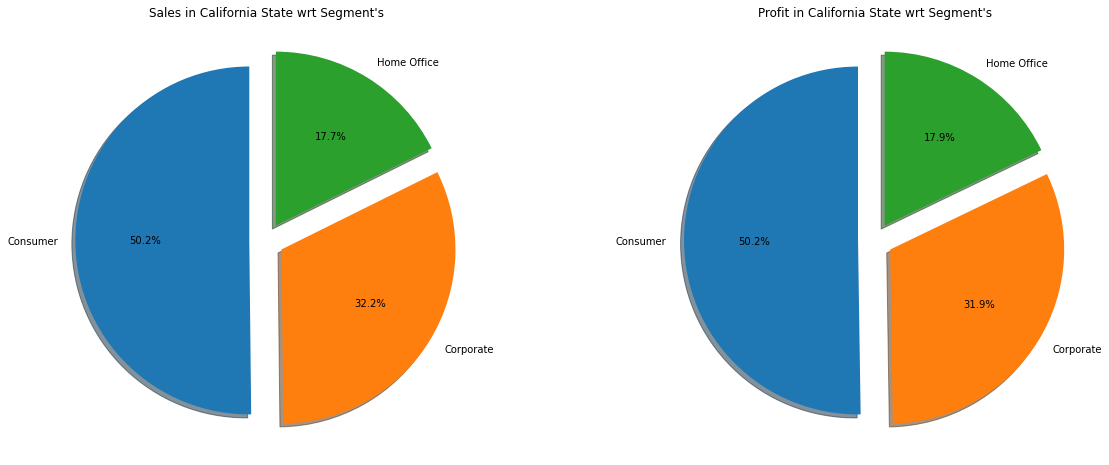

In [215]:

fig1, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
size1=sales.values
size2=profit.values
explode=(0.1,0.1,0.1,)
labels=['Consumer','Corporate','Home Office']
x=ax1.pie(size1, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
y=ax2.pie(size2, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title('Sales in California State wrt Segment\'s')
ax2.set_title('Profit in California State wrt Segment\'s')




California have the most sales in the US. <br>
The store needs to increase its production in these top 5 States.

In [23]:
retail[retail['State']=='California']['City'].value_counts().sort_values(ascending=False).head()

Los Angeles      747
San Francisco    510
San Diego        170
San Jose          42
Long Beach        27
Name: City, dtype: int64

Text(0.5, 1.0, 'Top 5 Cities in California State with most Sales')

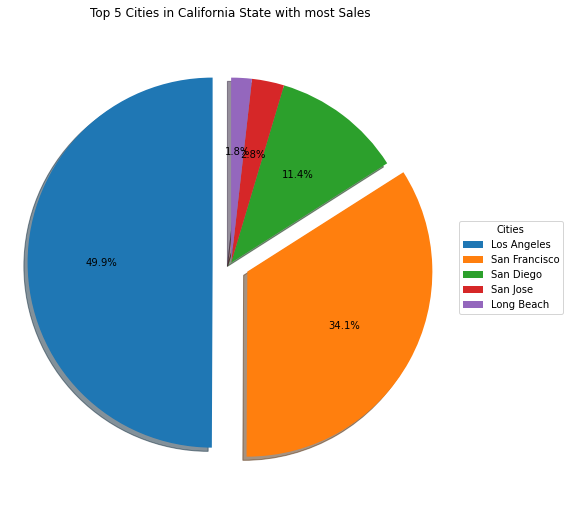

In [220]:
#Top 5 Cities in California State with most Sales

z=retail[retail['State']=='California']['City'].value_counts().sort_values(ascending=False).head()
fig1, ax1 = plt.subplots(figsize=(8,9))
sizes=z.values
explode=(0.1,0.1,0,0,0)
x=ax1.pie(sizes, explode=explode,autopct='%1.1f%%',
        shadow=True, startangle=90)
y=ax1.axis('equal')
ax1.legend(z.index,
          title="Cities",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Top 5 Cities in California State with most Sales")

<AxesSubplot:xlabel='Category'>

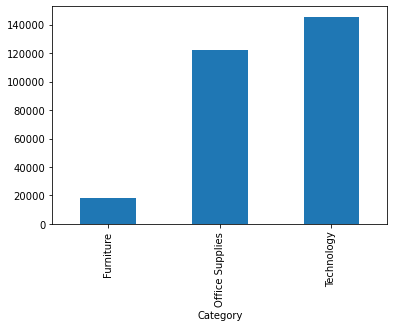

In [25]:
retail.groupby('Category').sum()['Profit'].plot(kind='bar')

## The Profit in Technology Category is higher than the other categories.<br>
## The stores need to work on the "Furniture Catgory" to make more profit

In [26]:
retail.groupby('Sub-Category').sum()['Profit'].sort_values(ascending=False).head()

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64

In [230]:
z=retail.groupby('Sub-Category').sum()['Profit'].sort_values(ascending=False)
z=pd.DataFrame(z)
z.reset_index(inplace=True)

Text(0.5, 1.0, 'Profits in Sub-Categories')

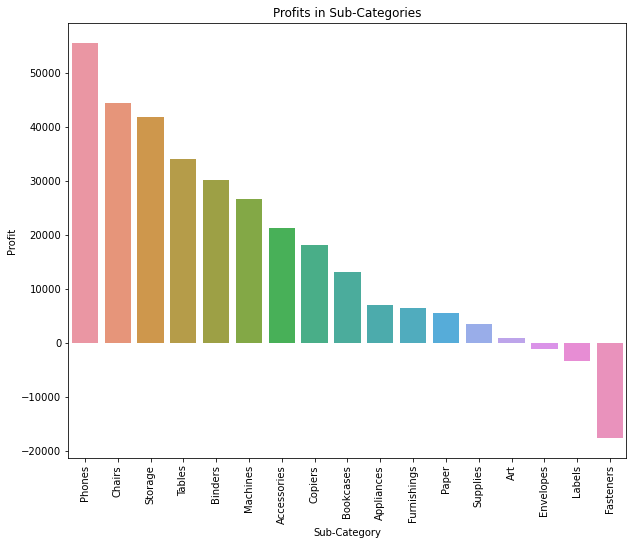

In [240]:
plt.figure(figsize=(10,8))
x=sns.barplot(x='Sub-Category',y='Profit',data=z).set_xticklabels(rotation=90,labels=d['Sub-Category'])
plt.title('Profits in Sub-Categories')

Text(0.5, 1.0, 'Top 5 Sub-Categories with most Profit')

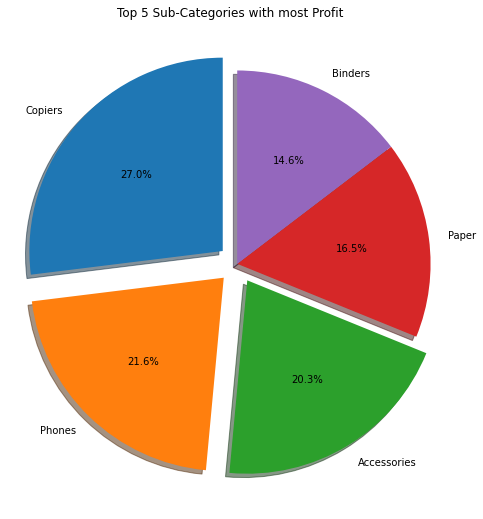

In [221]:
z=retail.groupby('Sub-Category').sum()['Profit'].sort_values(ascending=False).head()
fig1, ax1 = plt.subplots(figsize=(8,9))
sizes=z.values
explode=(0.1,0.1,0.1,0,0)
labels=z.index
x=ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
y=ax1.axis('equal')
plt.title("Top 5 Sub-Categories with most Profit")

Store makes the most profit with the Copiers

In [28]:
retail.groupby('Sub-Category').sum()['Profit'].sort_values(ascending=True).head(5)

Sub-Category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Fasteners      949.5182
Machines      3384.7569
Name: Profit, dtype: float64

The stores need to discontinue "Tables","BookCases", and "Suplies" as store is incurring loss in these sub-categories.

Store is suffering most loss with the Tables

<AxesSubplot:>

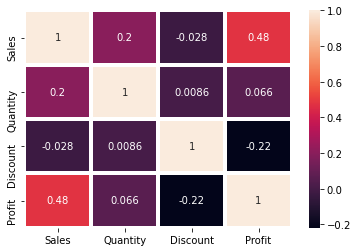

In [29]:
y=retail.drop('Postal Code',axis=1).corr()
sns.heatmap(y,annot=True,lw=3)

<AxesSubplot:>

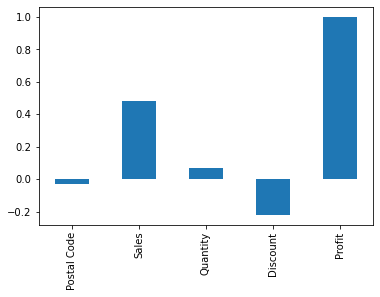

In [30]:
retail.corr()['Profit'].plot(kind='bar')

**INSIGHTS**

1) The Store is making most sales in California state.<br>
2) The Store is making the least profit in FURNITURES category.<br>
3) The Store is making most sales and profit in the Consumer Segment.<br>
4) The most sold sub-category is Binders.<br>
5) The Store is making most profit in Copiers sub-category and least profit in Fasteners sub-category.<br>
6) The Store is having loss in Tables, Bookcases, and Supplies sub-category.<br>

## Thank You